In [9]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline

In [4]:
from common import hourly_4d
pred = np.load('../MTF-1H-7-pred-hourly.npy')
tensor = np.load('../1H-input.npy')

In [5]:

from tensor_custom_core import stf_4dim_time, stf_4dim_time_day
home, appliance, day_mtf, hour_mtf = stf_4dim_time(tensor, 3, num_iter=20)

962.042681952 0


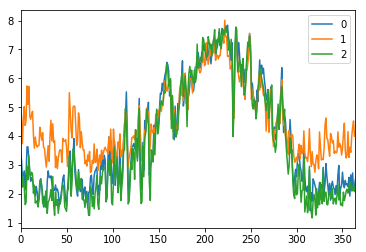

In [11]:
pd.DataFrame(day_mtf).plot()

In [6]:

from tensor_custom_core import stf_4dim_time, stf_4dim_time_day
home, appliance, day_mtf_new, hour_mtf_new = stf_4dim_time_day(tensor, 3, num_iter=20)

962.56276075 0


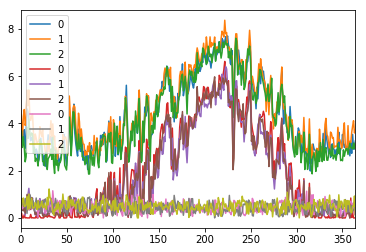

In [31]:
ax = pd.DataFrame(day_mtf_new[0]).plot()
pd.DataFrame(day_mtf_new[1]).plot(ax=ax)
pd.DataFrame(day_mtf_new[4]).plot(ax=ax)

In [112]:
mean_pred = np.zeros_like(tensor)
mean_pred[:] = np.nan
for a in range(7):
    mean_pred[:, a, :, :] = np.nanmean(tensor[:, a, :, :], axis=0)

/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [8]:
e = hourly_4d(tensor, pred)


In [63]:
e.mean()

aggregate     0.321266
dw           52.908186
fridge        0.518624
hvac          1.600236
mw           10.516221
oven         95.029137
wm           21.957655
dtype: float64

In [119]:
appliance='hvac'
val = np.percentile(e[appliance].dropna(), 95)
e[[appliance]].query('%s > @val' %appliance).head(10)

,hvac
69,4.475772
83,38.694329
111,7.888654
115,4.405965
137,9.793319
144,26.640804
166,77.173161
198,6.602142
221,12.630256
231,20.121717


In [86]:
pred.shape

(320, 7, 365, 24)

In [113]:
error = pred-tensor
error_1 = error[:, 5, :, :].reshape(320, 365*24)
error_2 = (mean_pred-tensor)[:, 5, :, :].reshape(320, 365*24)

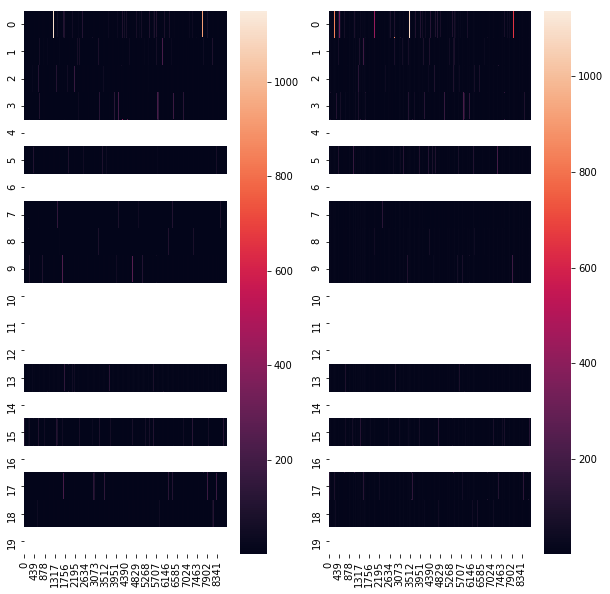

In [117]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 10))
sns.heatmap(np.abs(error_1)[:20], ax=ax[0])
sns.heatmap(np.abs(error_2)[:20], ax=ax[1])

/Users/nipun/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


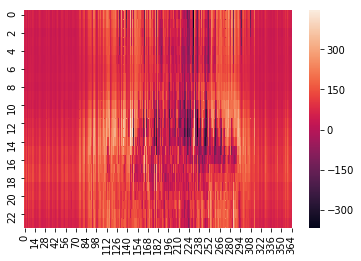

In [85]:
sns.heatmap(np.nanmedian(error_1, axis=0).T)

In [56]:
from tensor_custom_core import *
from common import APPLIANCES_ORDER

In [57]:
tensor = np.load('../1H-input.npy')

In [58]:
pred_mtf_7 = np.load('../MTF-1H-7-pred-hourly.npy')

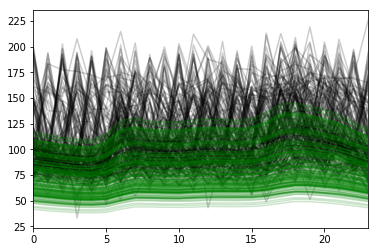

In [137]:
appliance='fridge'
home = 1
appliance_num =APPLIANCES_ORDER.index(appliance)
st, end =  10, 230
p = pd.DataFrame(pred[home, appliance_num, st:end, :]).T
gt = pd.DataFrame(tensor[home, appliance_num, st:end, :]).T

ax = gt.plot(label='GT', color='k',alpha=0.2, legend=False)


p.plot(label='Pred', color='g',alpha=0.2, ax=ax, legend=False)
#plt.legend()

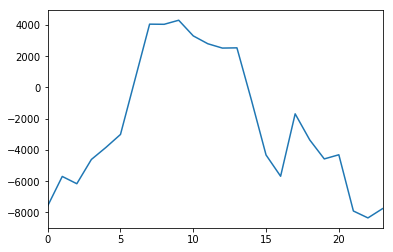

In [60]:
(gt-p).sum(axis=1).plot()

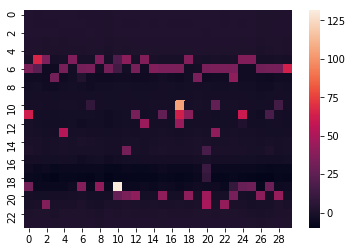

In [47]:
import seaborn as sns
#sns.heatmap(p)
sns.heatmap(gt-p)

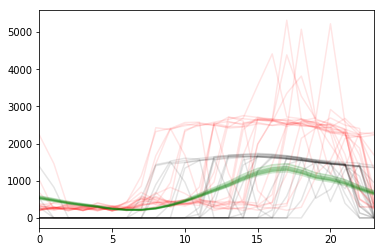

In [134]:
st, end = 200, 220
gt_agg = pd.DataFrame(tensor[home, 0, st:end, :]).T
gt_app = pd.DataFrame(tensor[home, 1, st:end, :]).T
pred_app = pd.DataFrame(pred[home, 1, st:end, :]).T



ax = gt_agg.plot(color='r',alpha=0.1, legend=False)
gt_app.plot(color='k',alpha=0.1, legend=False, ax=ax)
pred_app.plot(color='green',alpha=0.1, legend=False, ax=ax)





In [6]:
np.nanmean(tensor, axis=0)[:, :, :].shape

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/autograd/core.py:69: RuntimeWarning: Mean of empty slice
  result_value = self.fun(*argvals, **kwargs)


(7, 365, 24)

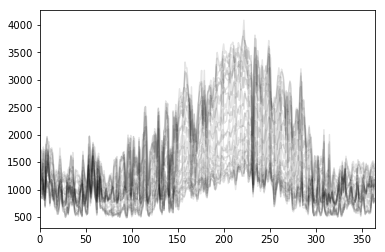

In [39]:
pd.DataFrame(np.nanmean(tensor, axis=0)[0, :, :]).plot(color='k', legend=False, alpha=0.1)

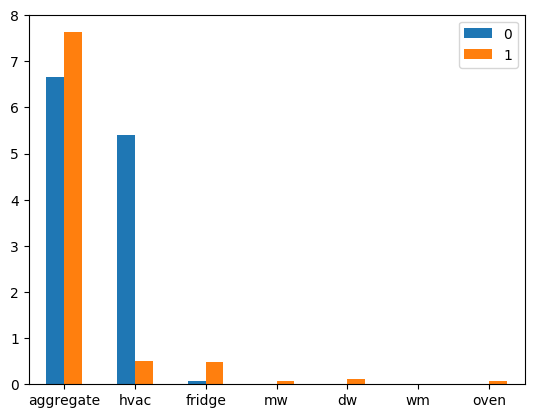

In [29]:
sns.reset_defaults()
from common import APPLIANCES_ORDER
pd.DataFrame(appliance, index=APPLIANCES_ORDER).plot(kind='bar',rot=0)

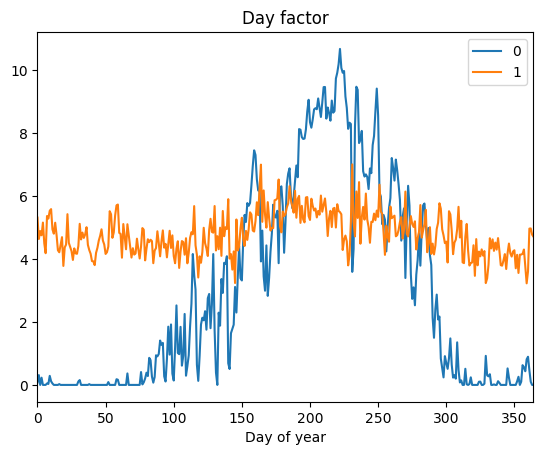

In [30]:
pd.DataFrame(day).plot()
plt.xlabel("Day of year")
plt.title("Day factor")

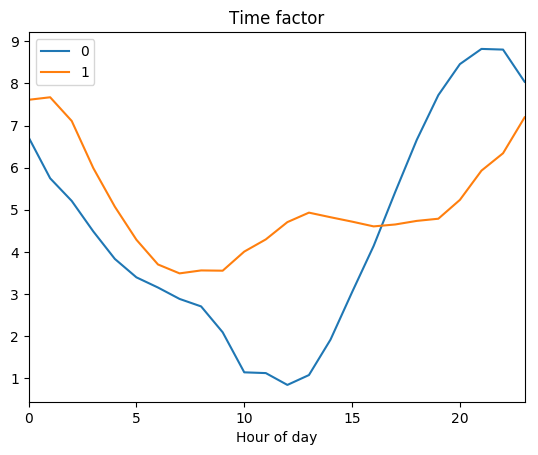

In [31]:
pd.DataFrame(hour).plot()
plt.xlabel("Hour of day")
plt.title("Time factor")

In [10]:
import seaborn as sns

In [59]:
tensor[:, 0, :, :].shape


(318, 365, 24)

In [22]:
labels[0].get_text()

u'364'

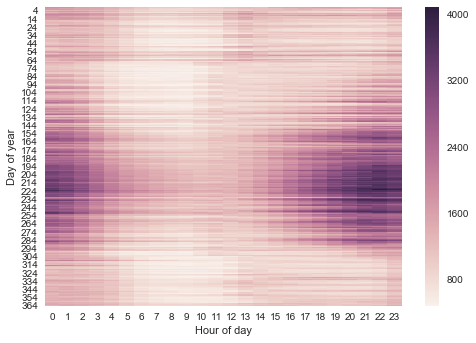

In [24]:
ax = sns.heatmap(np.nanmean(tensor[:, 0, :, :], axis=0))
labels = ax.get_yticklabels()
o = []
for i, x in enumerate(labels):
    if i%10==0:
        o.append(x.get_text())
    else:
        o.append(' ')

ax.set_yticklabels(o);
plt.xlabel("Hour of day")
plt.ylabel("Day of year")

In [56]:
%matplotlib inline

In [48]:
t = tensor[:20, :, :, :]
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
pred = np.zeros_like(t)
pred[:] = np.nan

for train, test in kf.split(t):
    print "*"*20, train, test
    t_copy = t.copy()
    t_copy[test][1:, :, :] = np.nan
    home, appliance, day, hour = stf_4dim(tensor=t_copy, r=2, num_iter=200, lr=2)
    pred[test] = np.einsum("Hr, Ar, Dr, Tr ->HADT", home, appliance, day, hour)[test]
   
    
    

******************** [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
920.948306858 0
418.718995597 200
418.713382716 400
418.708294084 600
418.705847477 800
******************** [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
920.948306858 0


KeyboardInterrupt: 

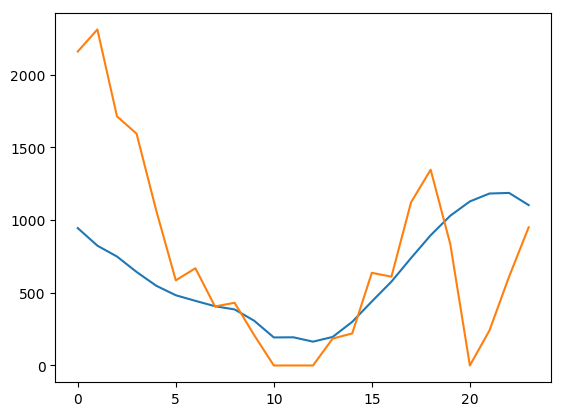

In [47]:
plt.plot(pred[0, 1, 190, :])
plt.plot(t[0, 1, 190, :])

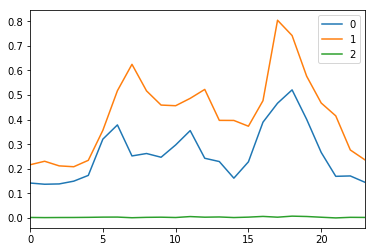

In [146]:
from tensor_custom_core import s

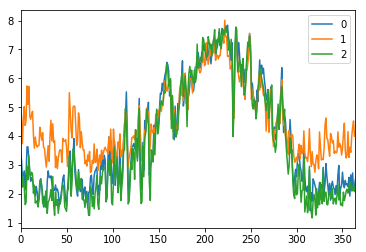

In [149]:
pd.DataFrame(day).plot()